In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate, integrate
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, UniformTriRefiner, CubicTriInterpolator, LinearTriInterpolator, TriInterpolator, TriAnalyzer

https://stackoverflow.com/questions/63220629/inverse-of-numpy-gradient-function

In [2]:
df = pd.read_excel('./Trial-Wireup 2.xlsx')

In [3]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
t = df['Delay'].to_numpy()

In [4]:
r = np.stack([x, y]).T

In [5]:
tri = Triangulation(x, y)

In [6]:
S = LinearTriInterpolator(tri, t)

In [7]:
#S = interpolate.CloughTocher2DInterpolator(r, t)
#S = interpolate.LinearNDInterpolator(r, t)
#S = interpolate.NearestNDInterpolator(r, t)
#S = interpolate.Rbf(x, y, t, epsilon=0.1, function='thin_plate')

In [8]:
N = 200
xl = np.linspace(x.min(), x.max(), N)
yl = np.linspace(y.min(), y.max(), N)
X, Y = np.meshgrid(xl, yl)

In [9]:
#tl = S(np.stack([X.ravel(), Y.ravel()]).T)
tl = S(X.ravel(), Y.ravel())

In [10]:
T = tl.reshape(X.shape)

In [11]:
T = interpolate.griddata((x, y), t, (X, Y), method='linear')

In [43]:
DT = np.gradient(T, xl, yl, edge_order=1)

In [48]:
DT = S.gradient(X.ravel(), Y.ravel())
DT = [x.reshape(X.shape) for x in DT]

In [49]:
lt = np.linspace(0, 5000, 11)

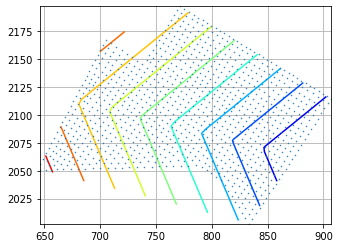

In [50]:
axe = plt.contour(X, Y, T, lt, cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

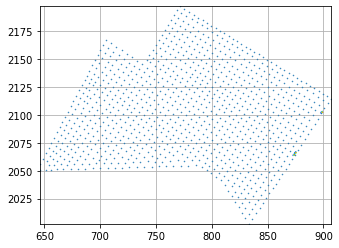

In [51]:
axe = plt.contour(X, Y, DT[0], cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

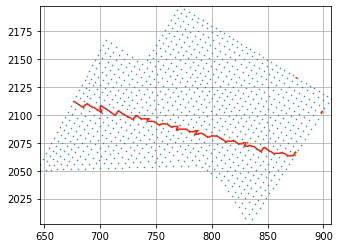

In [52]:
axe = plt.contour(X, Y, DT[1], cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

In [53]:
stepx = np.diff(xl)[0]
stepy = np.diff(yl)[0]

In [54]:
# Calculate Gradient (velocity ms/m)
(dy, dx) = DT  # Find gradient for points on meshgrid

Velocity_dx = dx   # x velocity component ms/m
Velocity_dy = dy   # y velocity component ms/m

# Integrate to compare the original data input
dxintegral = np.nancumsum(Velocity_dx, axis=1) * stepx
dyintegral = np.nancumsum(Velocity_dy, axis=0) * stepy

n = N
valintegral = np.ma.zeros(dxintegral.shape)
for i in range(n):
    for j in range(n):
        valintegral[i, j] = np.ma.sum([dxintegral[0, n // 2],  dyintegral[i, n // 2], dxintegral[i, j], - dxintegral[i, n // 2]])
valintegral = valintegral * np.isfinite(dxintegral)
min_value = np.nanmin(valintegral)
valintegral = valintegral + (min_value * -1)

/home/jlandercy/.local/lib/python3.6/site-packages/numpy-1.18.2-py3.6-linux-x86_64.egg/numpy/ma/core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


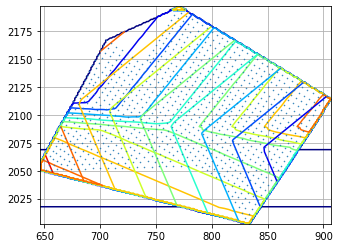

In [38]:
axe = plt.contour(X, Y, valintegral.data, lt, cmap='jet')
axe = plt.contour(X, Y, T, lt, cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

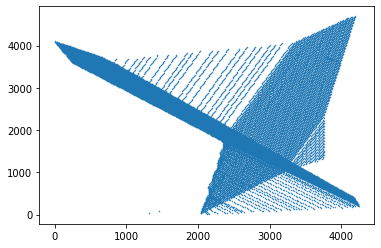

In [39]:
fig, axe = plt.subplots()
axe.plot(valintegral.data.ravel(), T.ravel(), '.', markersize=1)

In [40]:
T

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])